In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
import math

In [2]:
auc_root = 'X:\\jechoi\\numpy\\Radiogenomics+genomics_raiomics_LAUD+LSCC\\train_val_test\\AUC data'

In [3]:
Unet_DL_prob = np.load(auc_root + '\\Unet+DL\\probability.npy')
Unet_DL_label = np.load(auc_root + '\\Unet+DL\\test_real.npy')
Unet_SVM_prob =  np.load(auc_root + '\\Unet+SVM\\probability.npy')
Unet_SVM_label = np.load(auc_root + '\\Unet+SVM\\test_real.npy')
Unet_RF_prob = np.load(auc_root + '\\Unet+RF\\probability.npy')
Unet_RF_label = np.load(auc_root + '\\Unet+RF\\test_real.npy')
Base_ae_RF_prob = np.load(auc_root + '\\baseautoencoder+DL\\probability.npy')
Base_ae_label = np.load(auc_root + '\\baseautoencoder+DL\\test_real.npy')

In [4]:
fpr1, tpr1, threshold1 = roc_curve(Unet_DL_label.reshape(37, ), Unet_DL_prob[:,1], pos_label = 1)
auc_score1 = roc_auc_score(Unet_DL_label.reshape(37, ), Unet_DL_prob[:,1])

In [5]:
auc_score1

0.8235294117647058

In [6]:
fpr2, tpr2, threshold2 = roc_curve(Unet_SVM_label.reshape(37, ), Unet_SVM_prob[:,1], pos_label = 1)
auc_score2 = roc_auc_score(Unet_SVM_label.reshape(37, ), Unet_SVM_prob[:,1])

In [7]:
auc_score2

0.7823529411764706

In [8]:
fpr3, tpr3, threshold3 = roc_curve(Unet_RF_label.reshape(37, ), Unet_RF_prob[:,1], pos_label = 1)
auc_score3 = roc_auc_score(Unet_RF_label.reshape(37, ), Unet_RF_prob[:,1])

In [9]:
auc_score3

0.7823529411764706

In [10]:
fpr4, tpr4, threshold4 = roc_curve(Base_ae_label.reshape(37, ), Base_ae_RF_prob[:,1], pos_label = 1)
auc_score4 = roc_auc_score(Base_ae_label.reshape(37, ), Base_ae_RF_prob[:,1])

In [11]:
auc_score4

0.5764705882352941

In [12]:
save_root = 'D:\\radiogenomics+radiomics_genomics_LAUD+LSCC'

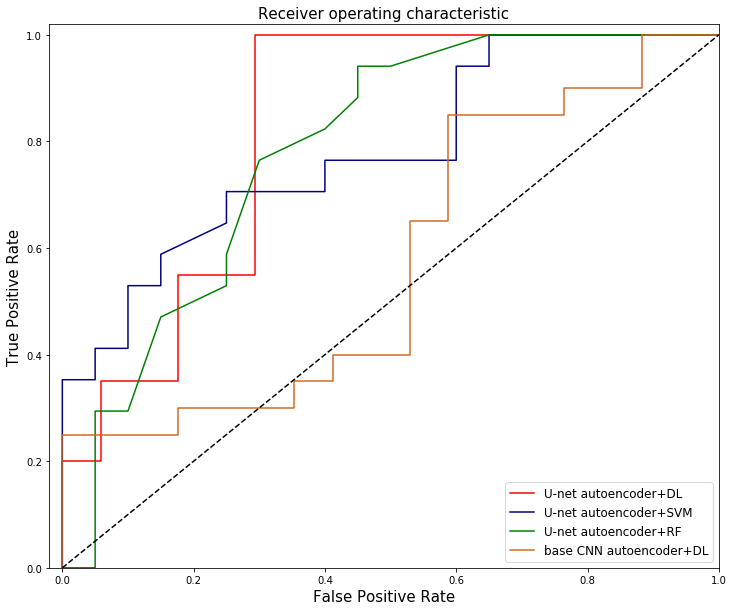

In [13]:
plt.plot(fpr1,tpr1, color = 'red', label='U-net autoencoder+DL')
plt.plot(fpr2,tpr2, color = 'navy', label='U-net autoencoder+SVM')
plt.plot(fpr3,tpr3, color = 'green', label='U-net autoencoder+RF')
plt.plot(fpr4,tpr4, color = 'chocolate', label='base CNN autoencoder+DL')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Receiver operating characteristic', fontsize = 15)
plt.legend(fontsize = 12, loc='lower right')
fig = plt.gcf()
fig.set_size_inches(12, 10)
fig.savefig(save_root + '\\total_roc_curve.png', dpi = fig.dpi)
plt.show()

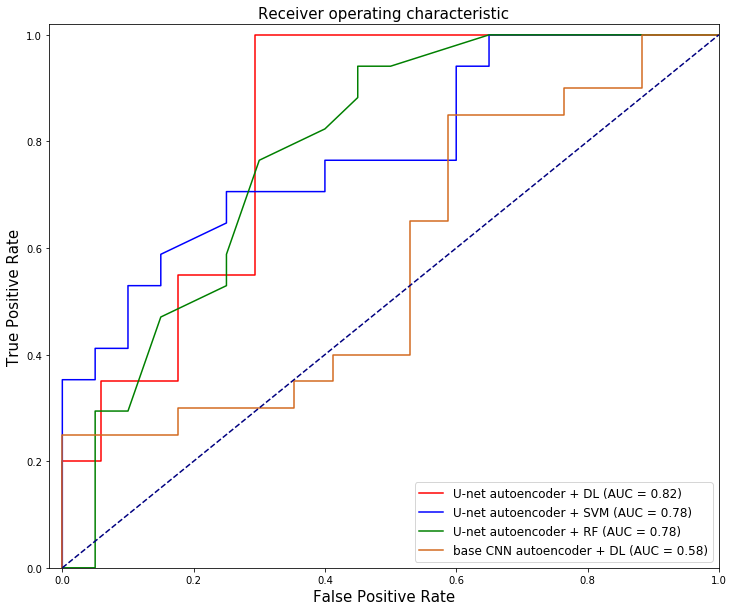

In [14]:
plt.plot(fpr1,tpr1, color = 'red', label='U-net autoencoder + DL (AUC = %0.2f)' % auc_score1)
plt.plot(fpr2,tpr2, color = 'blue', label='U-net autoencoder + SVM (AUC = %0.2f)' % auc_score2)
plt.plot(fpr3,tpr3, color = 'green', label='U-net autoencoder + RF (AUC = %0.2f)' % auc_score3)
plt.plot(fpr4,tpr4, color = 'chocolate', label='base CNN autoencoder + DL (AUC = %0.2f)' % auc_score4)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Receiver operating characteristic', fontsize = 15)
plt.legend(fontsize = 12, loc='lower right')
fig = plt.gcf()
fig.set_size_inches(12, 10)
fig.savefig(save_root + '\\total_roc_curve.png', dpi = fig.dpi)
plt.show()